In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style='darkgrid', palette='deep')
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [2]:
# Розглянемо перший датасет:
df1 = pd.read_csv('player_data.csv')

In [3]:
df1.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


<AxesSubplot:>

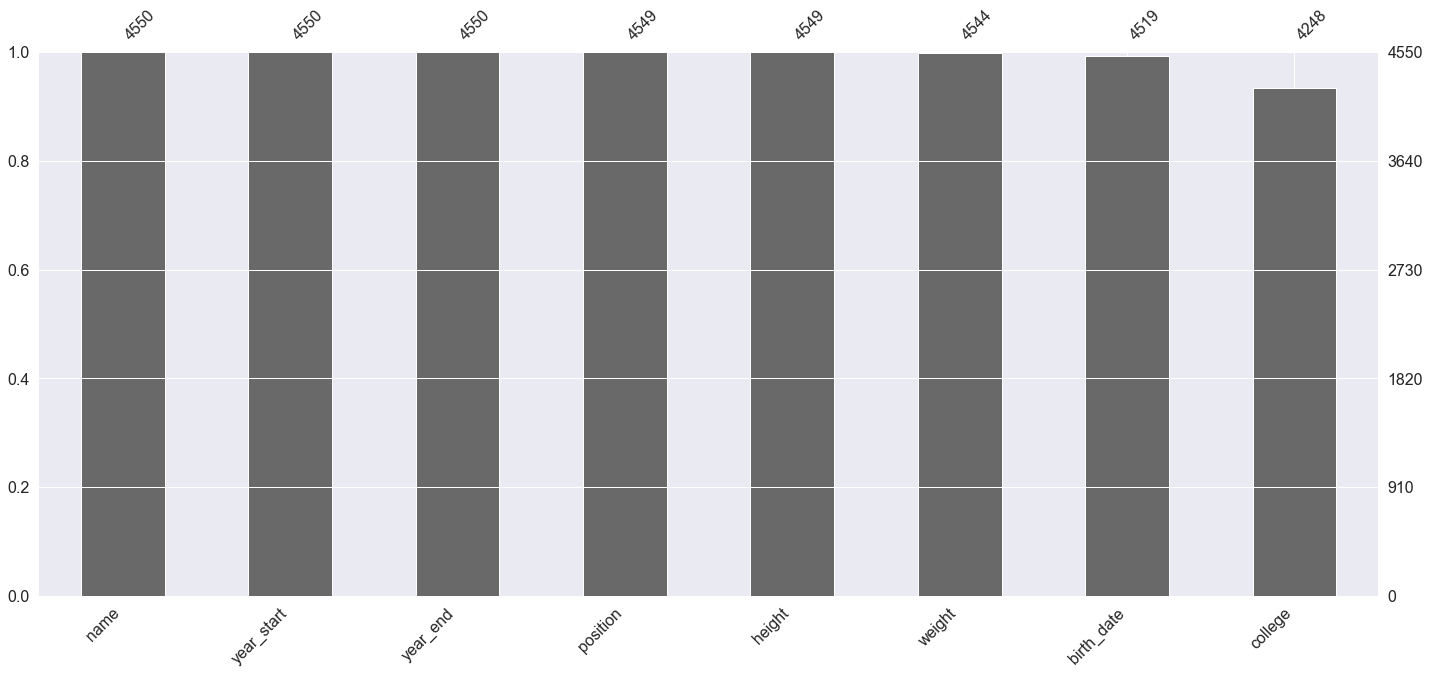

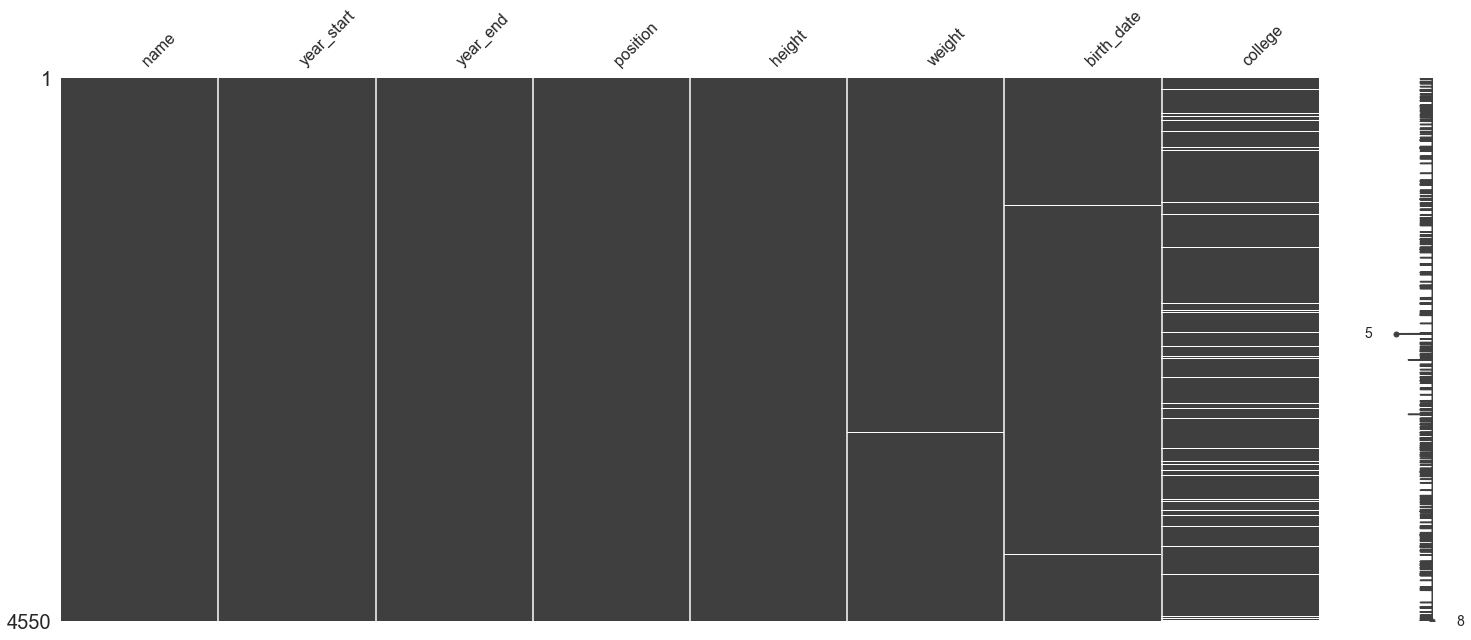

In [5]:
# Використаємо зручну бібліотеку missingno для візуалізації пропущенних значень по колонках:
msno.bar(df1)
msno.matrix(df1)

In [6]:
# Бачимо, що найбільше пропущенних значень у колонці college, яка нас не дуже цікавить.

In [7]:
# Конвертуємо зріст та вагу спортсменів у метричну систему, створюємо для них нові змінні:

def feet_to_cm(height):
    if pd.isna(height):
        return np.nan
    else:
        feet, inches = map(int, height.split('-'))
        total_inches = feet * 12 + inches
        cm = total_inches * 2.54
        return cm

df1['height_sm'] = df1['height'].apply(feet_to_cm)
df1['weight_kg'] = round(df1['weight'] * 0.45359237, 2)

# Також створимо нову змінну, що буде містити тривалість кар'єри кожного спортсмена:

df1['career'] = df1['year_end'] - df1['year_start']

In [8]:
df1.head()

,name,year_start,year_end,position,height,weight,birth_date,college,height_sm,weight_kg,career
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,208.28,108.86,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,205.74,106.59,9
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",218.44,102.06,19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,185.42,73.48,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,198.12,101.15,5


In [9]:
df1['height_sm'].describe()

count    4549.000000
mean      198.165786
std         9.266546
min       160.020000
25%       190.500000
50%       198.120000
75%       205.740000
max       231.140000
Name: height_sm, dtype: float64

<AxesSubplot:xlabel='height_sm', ylabel='Count'>

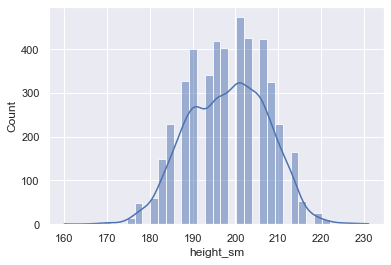

In [10]:
# Подивимось на графік розподілу зросту спортсменів:
sns.histplot(data=df1, x='height_sm', kde=True)

In [11]:
# Бачимо, що в цілому розподіл близький до нормального, хоча графік щільності і має "додатковий" пік у районі 190 см.
# Можливо, це пов'язано з тим, що для спортсменів, які грають на різних позиціях, характерні різни характеристики зросту,
# наприклад, на одній позиції важливо бути високим та потужним, а на іншій - мобільним та швидким.
# Давайте перевіримо розподіл зросту по позиціях за допомогою боксплотів:

<AxesSubplot:xlabel='position', ylabel='height_sm'>

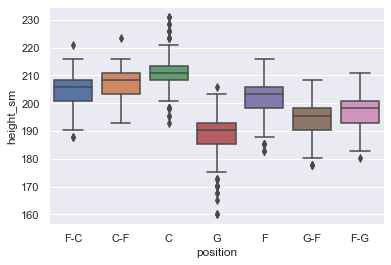

In [12]:
sns.boxplot(data=df1, y='height_sm', x='position')

In [13]:
# Наша гіпотеза підтвердилася, адже захисники (G) мають зріт в районі 190 см, тоді як 2 інші найбільш поширені позиції - 
# форварди (F) та центрові (C) мають зріст за 200 см. Інші позиції є проміжними та характеризуються зростом в діапазоні
# від захисників до центрових.
# Також з боксплотів можна побачити, що для захисників і центрових часто спостерігаються викиди - аномальні значення
# зросту. Майже всі спортсмени зі зростом менше 180см - захисники, а більше 220 см - центрові.

In [14]:
# Подивимось також на розподіл ваги спортсменів:

<AxesSubplot:xlabel='weight_kg', ylabel='Count'>

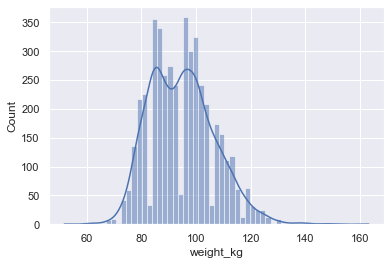

In [15]:
sns.histplot(data=df1.weight_kg.dropna(), kde=True)

In [16]:
# Бачимо в цілому нормальний розподіл з двома піками, що швидше за все відповідають "швидким" та "потужним" групам гравців.

In [17]:
# Цікаво подивитись, як змінювався середній зріст гравців на протязі історії NBA.
# Для цього побудуємо лінійну залежність середнього зросту гравців від року старту кар'єри:

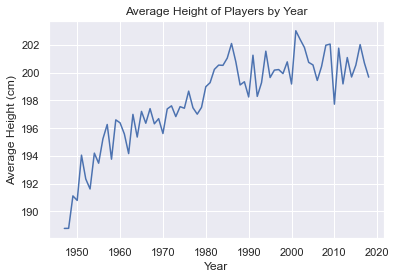

In [18]:
average_height = df1.groupby('year_start')['height_sm'].mean().to_frame()
sns.lineplot(data=average_height, x=average_height.index, y='height_sm')

plt.title('Average Height of Players by Year')
plt.xlabel('Year')
plt.ylabel('Average Height (cm)')

plt.show()

In [21]:
# Бачимо тенденцію до збільшення зросту, але графік не рівний, тому давайте спробуємо його згладити 
# за допомогою ф-її rolling:

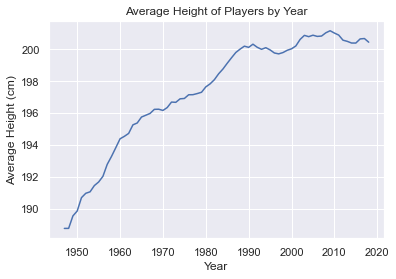

In [24]:
smoothed_height_df = average_height.rolling(window=10, min_periods=1).mean()
sns.lineplot(data=smoothed_height_df, x=smoothed_height_df.index, y='height_sm')

# Set the plot title and labels
plt.title('Average Height of Players by Year')
plt.xlabel('Year')
plt.ylabel('Average Height (cm)')

# Display the plot
plt.show()

In [25]:
# Так вже наглядніше=) Бачимо, що від самого початку середній зріст доволі швидко збільшується. Це можна пояснити розвитком
# ліги, поріг входження у яку постійно зростав. Така картина спостерігається приблизно до 1990 року, відколи середній зріст
# коливається в діапазоні +- 2 см.
# Важливо відмітити, що цей графік показує середній зріст саме новачків (у конкретний рік), а не усіх спортсменів ліги. 

In [26]:
# Ще одним цікавим показником може бути тривалість кар'єри спортсменів. 
# Побудуємо згладжений графік залежності тривалості кар'єри від року старту:

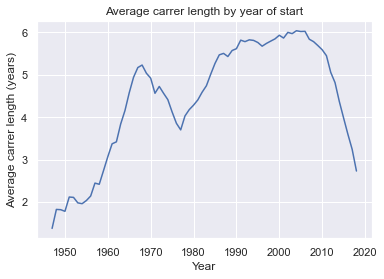

In [27]:
average_career = df1.groupby('year_start')['career'].mean().to_frame()
smoothed_career_df = average_career.rolling(window=10, min_periods=1).mean()

sns.lineplot(data=smoothed_career_df, x='year_start', y='career')

plt.title('Average carrer length by year of start')
plt.xlabel('Year')
plt.ylabel('Average carrer length (years)')

plt.show()

In [29]:
# Бачимо, що на початку існування ліги тривалість кар'єри ледь складала 2 роки, що може пояснюватися напівпрофесіонільним
# статусом змагань. Надалі з ростом популярності та комерціалізації баскетболу тривалість кар'єри зростала в середньому
# до 5 років. Але наприкінці 60-х картина змінилася, і на протязі десятиліття очікувана тривалість кар'єри впала приблизно
# на 1 рік до середнього значення менше 4-х років. Чому так сталося - невідомо. Можливі причини - зміна правил гри, 
# умов контрактів, загальної популярності гри. Це питання треба досліджувати окремо. 
# З початку 80-х тривалість кар'єри знов починає зростати та доходить майже до 6 років у 1990.
# Різкий провал наприкінці можна не брати до уваги, адже він обумовлений тим, що гравці, що розпочали кар'єру після 2010,
# ще її не завершили.

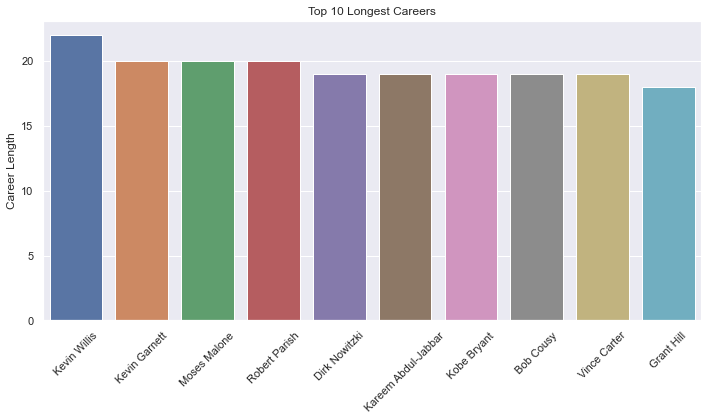

In [30]:
# Відодразимо 10 гравців з найдовшою кар'єрою:

df_sorted = df1.sort_values('career', ascending=False)

top_10_careers = df_sorted.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='career', data=top_10_careers)
plt.ylabel('Career Length')
plt.xlabel('')
plt.title('Top 10 Longest Careers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Бачимо, що при середньому значенні 5-6 років, цілком можливо грати на найвищому рівні і 20 років, прикладів досить багато.

In [32]:
# Давайте завантажимо другий датасет зі статистичними показниками гравців по сезонах:

In [33]:
df2 = pd.read_csv('Seasons_Stats.csv')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

In [34]:
df2.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


<AxesSubplot:>

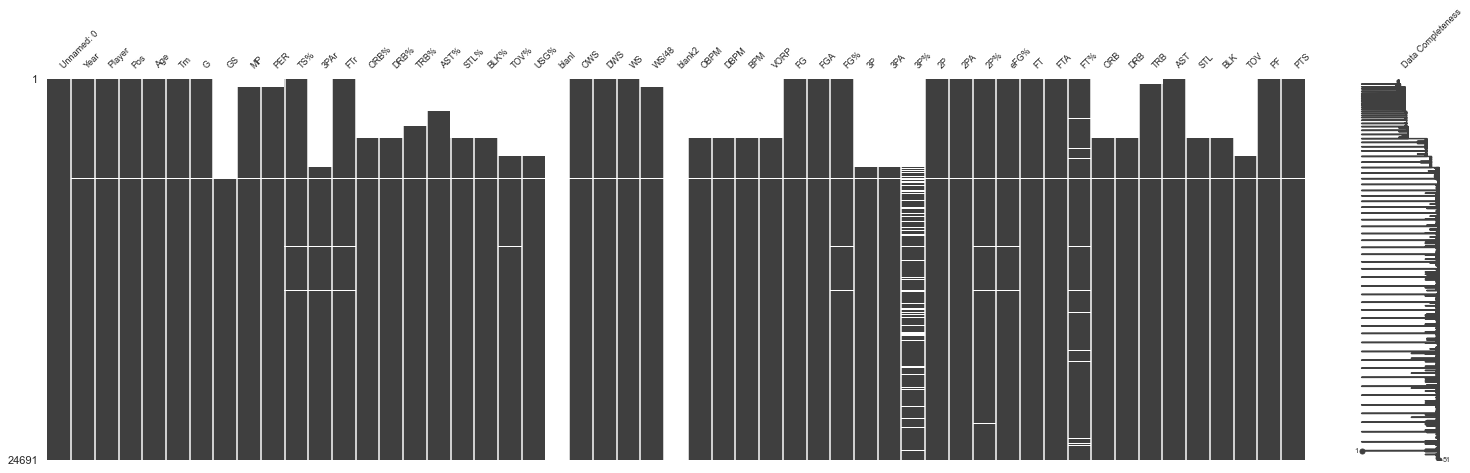

In [35]:
# Візуалізуємо відсутні значення:

msno.matrix(df2, figsize=(25, 7), labels=True, fontsize=9)

In [36]:
# Бачимо, що у більшості колонок пусті значення присутні на початку, що відповідає першим сезонам, коли окремі статистичні
# показники ще не збиралися. Надалі більшість показників присутня.
# Також маємо 2 повністю пусті колонки, давайте їх видалимо:
df2 = df2.drop(['blanl', 'blank2'], axis=1)

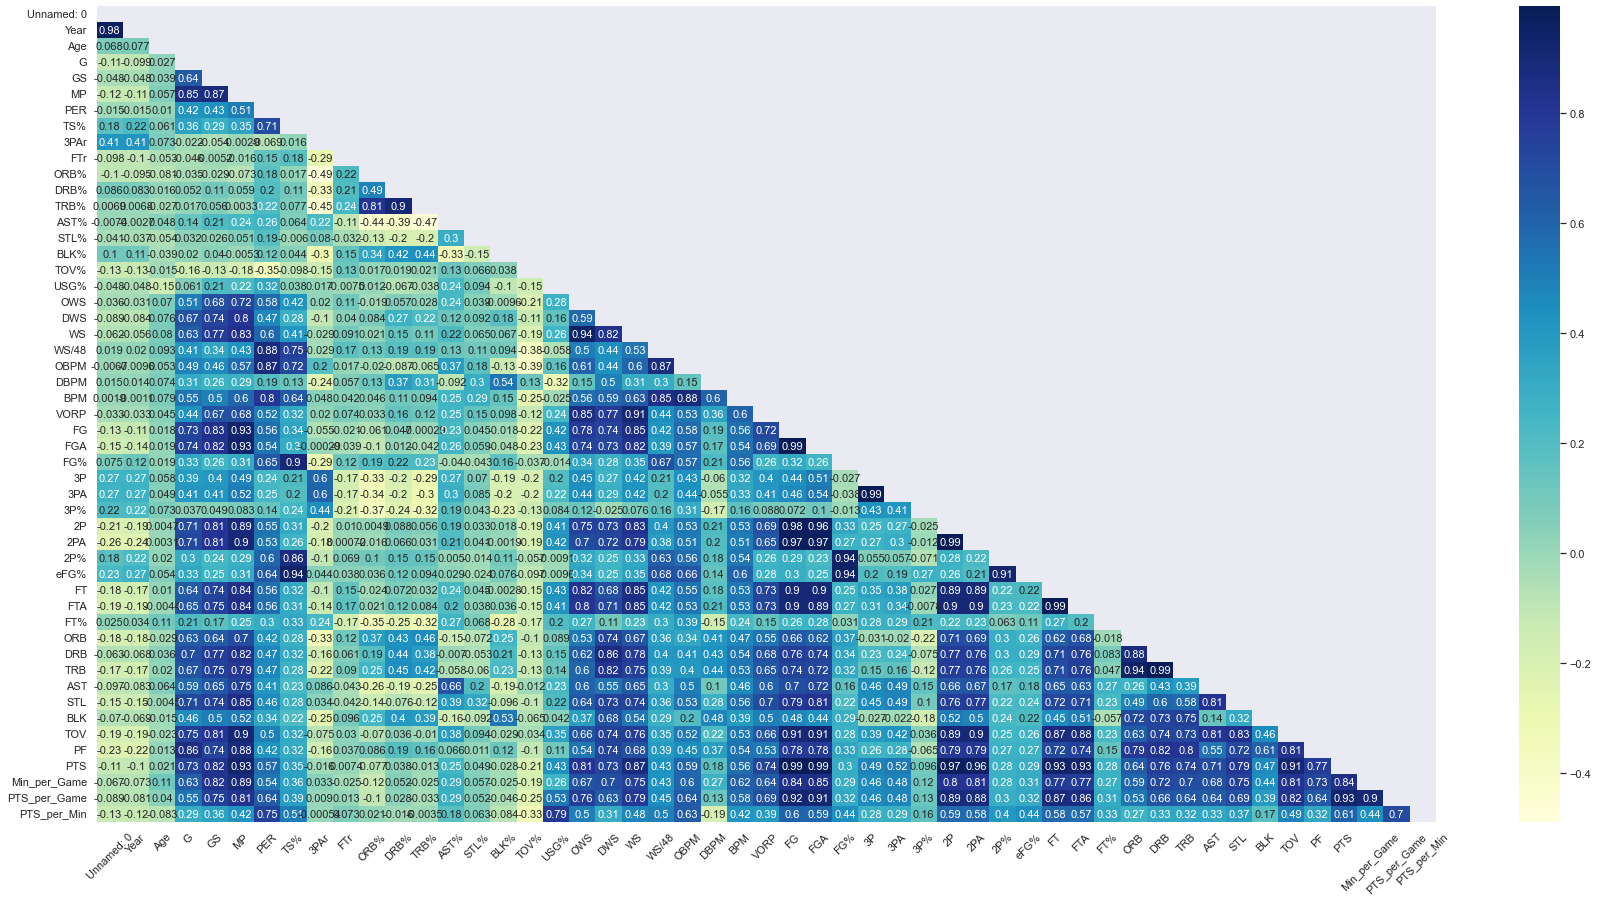

In [46]:
# Побудуємо матрицю кореляцій для цього датасету за допомогою heatmap:

corr_matrix = df2.corr()

plt.figure(figsize=(30, 15))

# Для зручності сприйняття створимо маску для правої верхньої частини матриці:
mask = np.triu(corr_matrix)

# Створимо теплову карту з врахуванням маски:
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
plt.xticks(rotation=45)
plt.show()

In [38]:
# Бачимо як значення, що свідчать про повністю відсутній зв'язок величин (близькі до 0), так і значення, близькі до 1, 
# що свідчать про мультиколініарність фіч. Наприклад, у останньому рядку значення кореляції між кількістю набраних 
# очок (PTS) та очками, набраними з гри (FG), складає 0.99. Якби ми будували модель, то вімовились би від настільки тісно
# пов'язаних фіч.

In [39]:
# Додамо нові фічі - середню кількість хвилин за одну гру (Min_per_Game), середню кількість очок за гру (PTS_per_Game),
# та середню кількість очок на хвилину (PTS_per_Min).
df2['Min_per_Game'] = df2['MP'] / df2['G']
df2['PTS_per_Game'] = df2['PTS'] / df2['G']
df2['PTS_per_Min'] = df2['PTS'] / df2['MP']

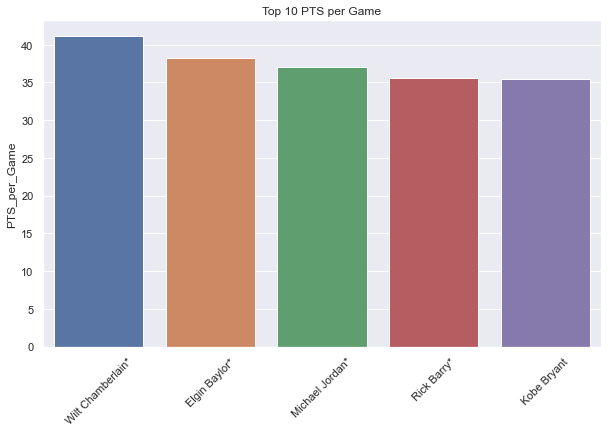

In [48]:
# Візуалізуємо одну з наших нових фіч - середню кількість очок за гру, та знайдемо топ-10 гравців по цьому показнику:

df2_sorted = df2.sort_values('PTS_per_Game', ascending=False)

top_10_PTS_per_Game = df2_sorted.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='PTS_per_Game', data=top_10_PTS_per_Game, ci=None)
plt.title('Top 10 PTS per Game')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

In [50]:
# Чомусь нам показується лише топ-5 гравців, хоча ми "замовляли" топ-10 =).
# Давайте подивимось на датафрейм, з якого ми намагаємось будувати графік:
top_10_PTS_per_Game

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,Min_per_Game,PTS_per_Game,PTS_per_Min
1706,1706,1962.0,Wilt Chamberlain*,C,25.0,PHW,80.0,NaN,3882.0,31.7,...,2052.0,192.0,NaN,NaN,NaN,123.0,4029.0,48.525000,50.362500,1.037867
1827,1827,1963.0,Wilt Chamberlain*,C,26.0,SFW,80.0,NaN,3806.0,31.8,...,1946.0,275.0,NaN,NaN,NaN,136.0,3586.0,47.575000,44.825000,0.942197
2100,2100,1965.0,Wilt Chamberlain*,C,28.0,SFW,38.0,NaN,1743.0,29.8,...,893.0,117.0,NaN,NaN,NaN,76.0,1480.0,45.868421,38.947368,0.849111
1593,1593,1961.0,Wilt Chamberlain*,C,24.0,PHW,79.0,NaN,3773.0,27.8,...,2149.0,148.0,NaN,NaN,NaN,130.0,3033.0,47.759494,38.392405,0.803870
1686,1686,1962.0,Elgin Baylor*,SF,27.0,LAL,48.0,NaN,2129.0,26.5,...,892.0,222.0,NaN,NaN,NaN,155.0,1836.0,44.354167,38.250000,0.862377
1473,1473,1960.0,Wilt Chamberlain*,C,23.0,PHW,72.0,NaN,3338.0,28.0,...,1941.0,168.0,NaN,NaN,NaN,150.0,2707.0,46.361111,37.597222,0.810965
8469,8469,1987.0,Michael Jordan*,SG,23.0,CHI,82.0,82.0,3281.0,29.8,...,430.0,377.0,236.0,125.0,272.0,237.0,3041.0,40.012195,37.085366,0.926852
1962,1962,1964.0,Wilt Chamberlain*,C,27.0,SFW,80.0,NaN,3689.0,31.6,...,1787.0,403.0,NaN,NaN,NaN,182.0,2948.0,46.112500,36.850000,0.799133
2355,2355,1967.0,Rick Barry*,SF,22.0,SFW,78.0,NaN,3175.0,24.2,...,714.0,282.0,NaN,NaN,NaN,258.0,2775.0,40.705128,35.576923,0.874016
17742,17742,2006.0,Kobe Bryant,SG,27.0,LAL,80.0,80.0,3277.0,28.0,...,425.0,360.0,147.0,30.0,250.0,233.0,2832.0,40.962500,35.400000,0.864205


In [ ]:
# Що ж, тепер причина зрозуміла: в топ-10 у нас лише 5 різних гравців, тому ми бачимо на графіку вище 5 стовбчиків.

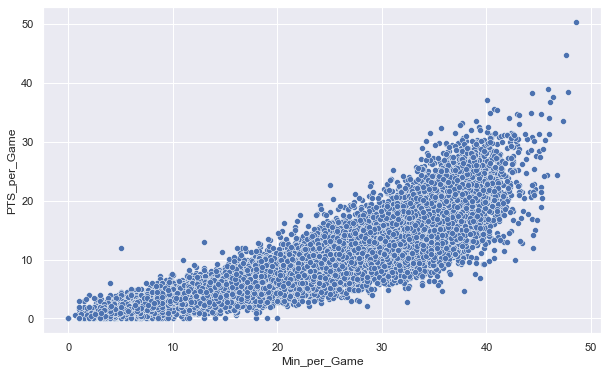

In [51]:
# Подивимось на діаграму розсіювання, в якій зобразимо залежність PTS_per_Game від Min_per_Game.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min_per_Game', y='PTS_per_Game', data=df2)
plt.xlabel('Min_per_Game')
plt.ylabel('PTS_per_Game')
plt.title('')
plt.show()

In [52]:
# Бачимо, що залежність має навіть не лінійний, а ступеневий характер. Тобто гравці, які проводять на майданчику найбільшу
# кількість часу, приносять набагато більше очок своїй команді. Це найцінніші гравці, яких намагаютья якомога довше не
# змінювати.

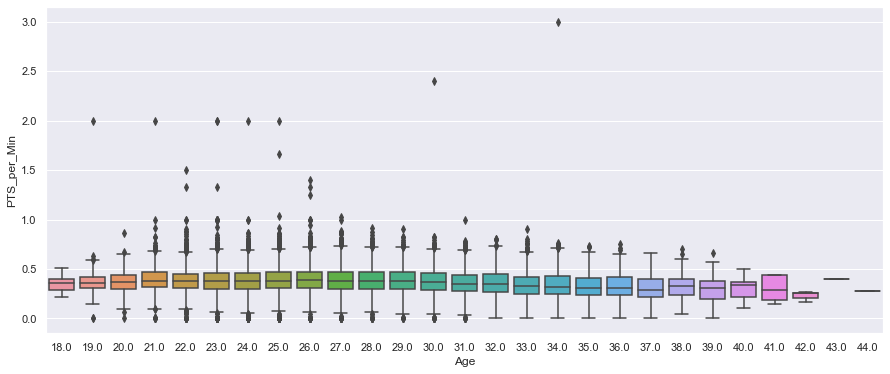

In [72]:
# Один з найважливіших показників на мою думку - це кількість очок за хвилину (PTS_per_Min). Він враховує безпосередню
# ефективність гравця, приведену до одиниці часу, а не до кількості матчів. Таким чином можна відокремити гравців, які
# грають небагато часу, але приносять велику кількість очок.
# Подивимось на залежність кількості очок за хвилину від віку гравця. Для цього використаємо боксплоти:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y='PTS_per_Min', data=df2)
plt.xlabel('Age')
plt.ylabel('PTS_per_Min')
plt.title('')
plt.show()

In [54]:
# Бачимо, що вік не сильно впливає на цю метрику. Тим не менш можна відокремити кілька проміжків віку, у які
# середня результативність гравців різниться. Давайте це і зробимо:

In [55]:
df2['age_group'] = pd.cut(df2.Age, [18, 23, 27, 30, 35, 50], \
                    labels=['Junior', 'Young', 'Prime', 'Mature', 'Veteran'])

df2.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,AST,STL,BLK,TOV,PF,PTS,Min_per_Game,PTS_per_Game,PTS_per_Min,age_group
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,176.0,NaN,NaN,NaN,217.0,458.0,NaN,7.269841,NaN,Mature
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,109.0,NaN,NaN,NaN,99.0,279.0,NaN,5.693878,NaN,Prime
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,192.0,438.0,NaN,6.537313,NaN,Young
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,20.0,NaN,NaN,NaN,29.0,63.0,NaN,4.200000,NaN,Young
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,20.0,NaN,NaN,NaN,27.0,59.0,NaN,4.538462,NaN,Young


In [56]:
# Давайте додамо колонку зросту у наш другий фрейм. Для цього об'єднаємо його з першим за іменем гравців. При такому 
# підході матимемо проблему з гравцями, у яких збігаються ім'я та прізвище, але таких в нас небагато, тому можемо цим
# знехтувати. 

In [58]:
# Переіменуємо назву колонки в першому датасеті для подальшого об'єднання:
df1 = df1.rename(columns={'name': 'Player'})

In [59]:
# Робимо об'єднання та перевіряємо, наскільки заповнилася колонка зросту:

merged_df = df2.merge(df1[['Player', 'height_sm']], on='Player', how='left')
merged_df.height_sm.info()

<class 'pandas.core.series.Series'>
Int64Index: 25297 entries, 0 to 25296
Series name: height_sm
Non-Null Count  Dtype  
--------------  -----  
23466 non-null  float64
dtypes: float64(1)
memory usage: 395.3 KB


In [60]:
# Бачимо, що десь 1700 значень не підтягнулось. Давайте їх заповнимо медіанним значенням по цій колонці:
median_height = merged_df['height_sm'].median()
merged_df['height_sm'] = merged_df['height_sm'].fillna(median_height)
merged_df.height_sm.info()

<class 'pandas.core.series.Series'>
Int64Index: 25297 entries, 0 to 25296
Series name: height_sm
Non-Null Count  Dtype  
--------------  -----  
25297 non-null  float64
dtypes: float64(1)
memory usage: 395.3 KB


In [61]:
# Тепер можна зробити окремі групи по зросту, як ми робили з віком: 

merged_df['height_group'] = pd.cut(merged_df.height_sm, [150, 170, 180, 190, 200, 210, 250], \
                    labels=['150-170', '170-180', '180-190', '190-200', '200-210', '210+'])

merged_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,BLK,TOV,PF,PTS,Min_per_Game,PTS_per_Game,PTS_per_Min,age_group,height_sm,height_group
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,217.0,458.0,NaN,7.269841,NaN,Mature,180.34,180-190
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,99.0,279.0,NaN,5.693878,NaN,Prime,187.96,180-190
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,192.0,438.0,NaN,6.537313,NaN,Young,193.04,190-200
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,29.0,63.0,NaN,4.200000,NaN,Young,195.58,190-200
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,27.0,59.0,NaN,4.538462,NaN,Young,195.58,190-200


<Figure size 720x432 with 0 Axes>

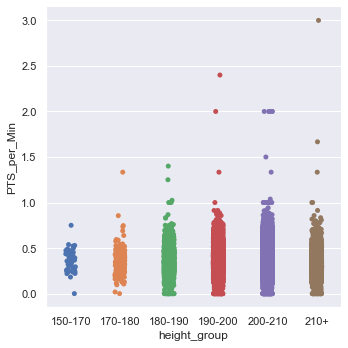

In [64]:
# Подивимось як залежить кількість очок за хвилину від зростової групи гравця. 
# Для різноманіття побудуємо catplot: 
merged_df.groupby('height_group').PTS_per_Min.mean()
plt.figure(figsize=(10, 6))
sns.catplot(x='height_group', y='PTS_per_Min', data=merged_df)
plt.xlabel('height_group')
plt.ylabel('PTS_per_Min')
plt.title('')
plt.show()

In [67]:
# Судячи з графіку, найбільша ефективність у гравців з груп 190-200 та 200-210.
# Подивимось також на значення у цифровому виразі:
merged_df.groupby('height_group').PTS_per_Min.mean()


height_group
150-170    0.363502
170-180    0.352907
180-190    0.365115
190-200    0.386537
200-210    0.390788
210+       0.339010
Name: PTS_per_Min, dtype: float64

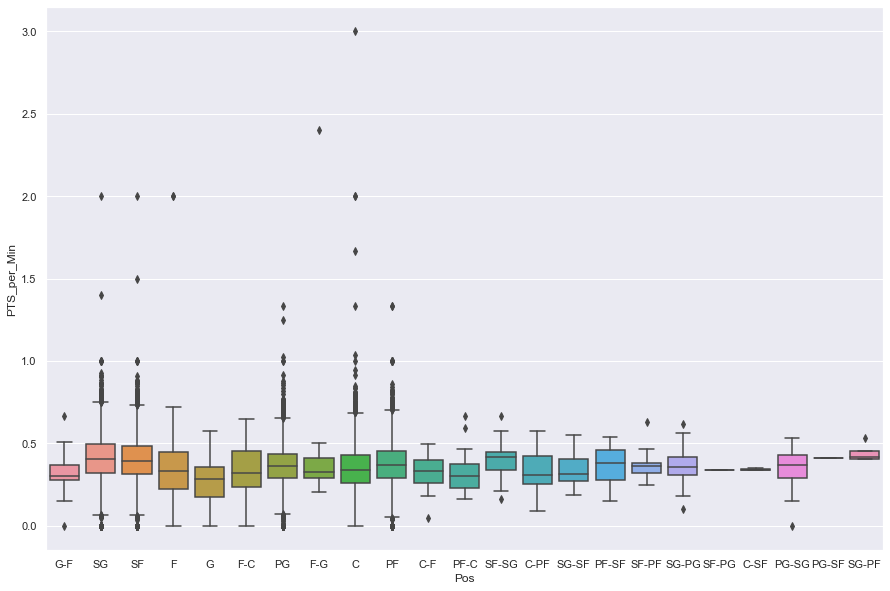

In [68]:
# Давайте подивимось як залежить результативність гравців за хвилину від позиції на майданчику:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Pos', y='PTS_per_Min', data=merged_df)
plt.xlabel('Pos')
plt.ylabel('PTS_per_Min')
plt.title('')
plt.show()

In [ ]:
# Нас не дуже цікавлять проміжні позиції, а от що стосується основних, то бачимо, що центрові та форварди мають
# приблизно однакову результативність, а от у захисників вона суттєва нижче. Також у центрових маємо найбільшу кількість
# викидів, зокрема аномальне значення 3 очки за хвилину.

<AxesSubplot:>

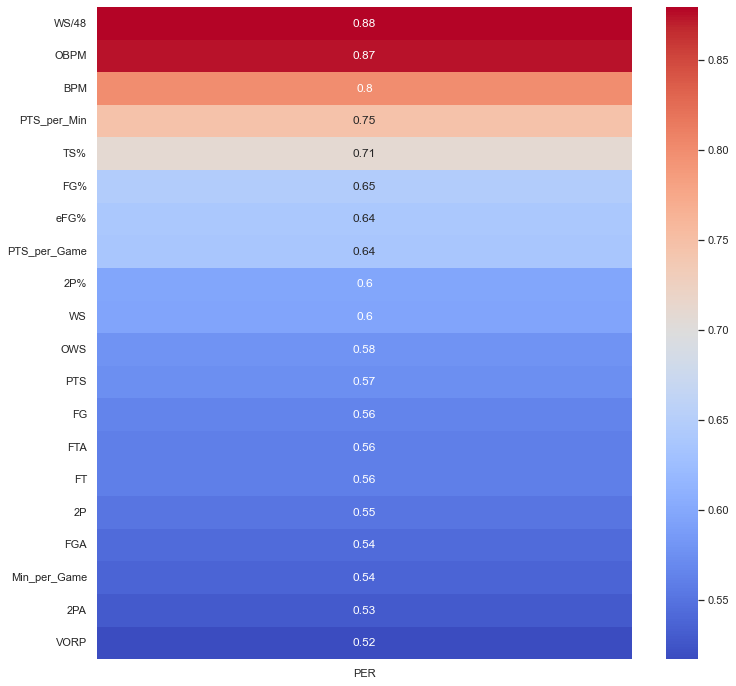

In [69]:
# Серед показників, представлених в таблиці, найбільш цікавим видається PER (Player Efficiency Rating), який розраховується
# за складною формулою та ще й залежить від перфомансу інших гравців. 
# Спробуємо визначити топ-20 показників, які впливають на PER та візуалізуємо їх за допомогою градієнтної теплової мапи:

plt.figure(figsize=(12, 12))
corr_matrix_new = df2.corr()['PER']
sns.heatmap(pd.DataFrame(corr_matrix_new.drop("PER").sort_values(ascending=False)[:20]), annot=True, cmap='coolwarm')

In [ ]:
# Бачимо, що найбільше на нього впливає показник WS/48 (Win Shares Per 48 Minutes), OBPM (Offensive Box Plus/Minus) та
# BPM (Box Plus/Minus). 

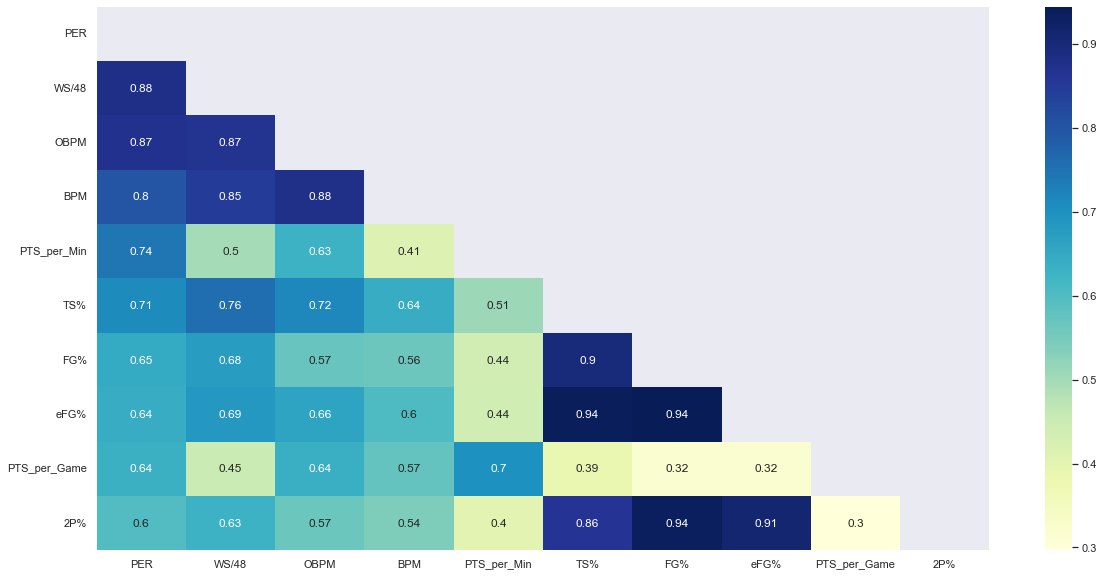

In [70]:
# Давайте побудуємо матрицю кореляцій тільки для топ-10 показників, що впливають на PER:

columns = list(corr_matrix_new.sort_values(ascending=False)[:10].index)

df_subset = merged_df[columns]

top10_corr = df_subset.corr()

plt.figure(figsize=(20, 10))

# Для зручності сприйняття створимо маску для правої верхньої частини матриці
mask = np.triu(top10_corr)

# Створимо теплову карту з врахуванням маски
sns.heatmap(top10_corr, cmap="YlGnBu", annot=True, mask=mask)
plt.show()

In [ ]:
# Бачимо, що деякі з цих фіч є мультиколініарними, наприклад, OBPM та BPM. Якби нашою метою буда побудова моделі з PER
# в якості цільової  змінної, то ми б взяли тільки одну з цих двох фіч. Те саме стосується фіч eFG% та FG% а також
# деяких інших пар.

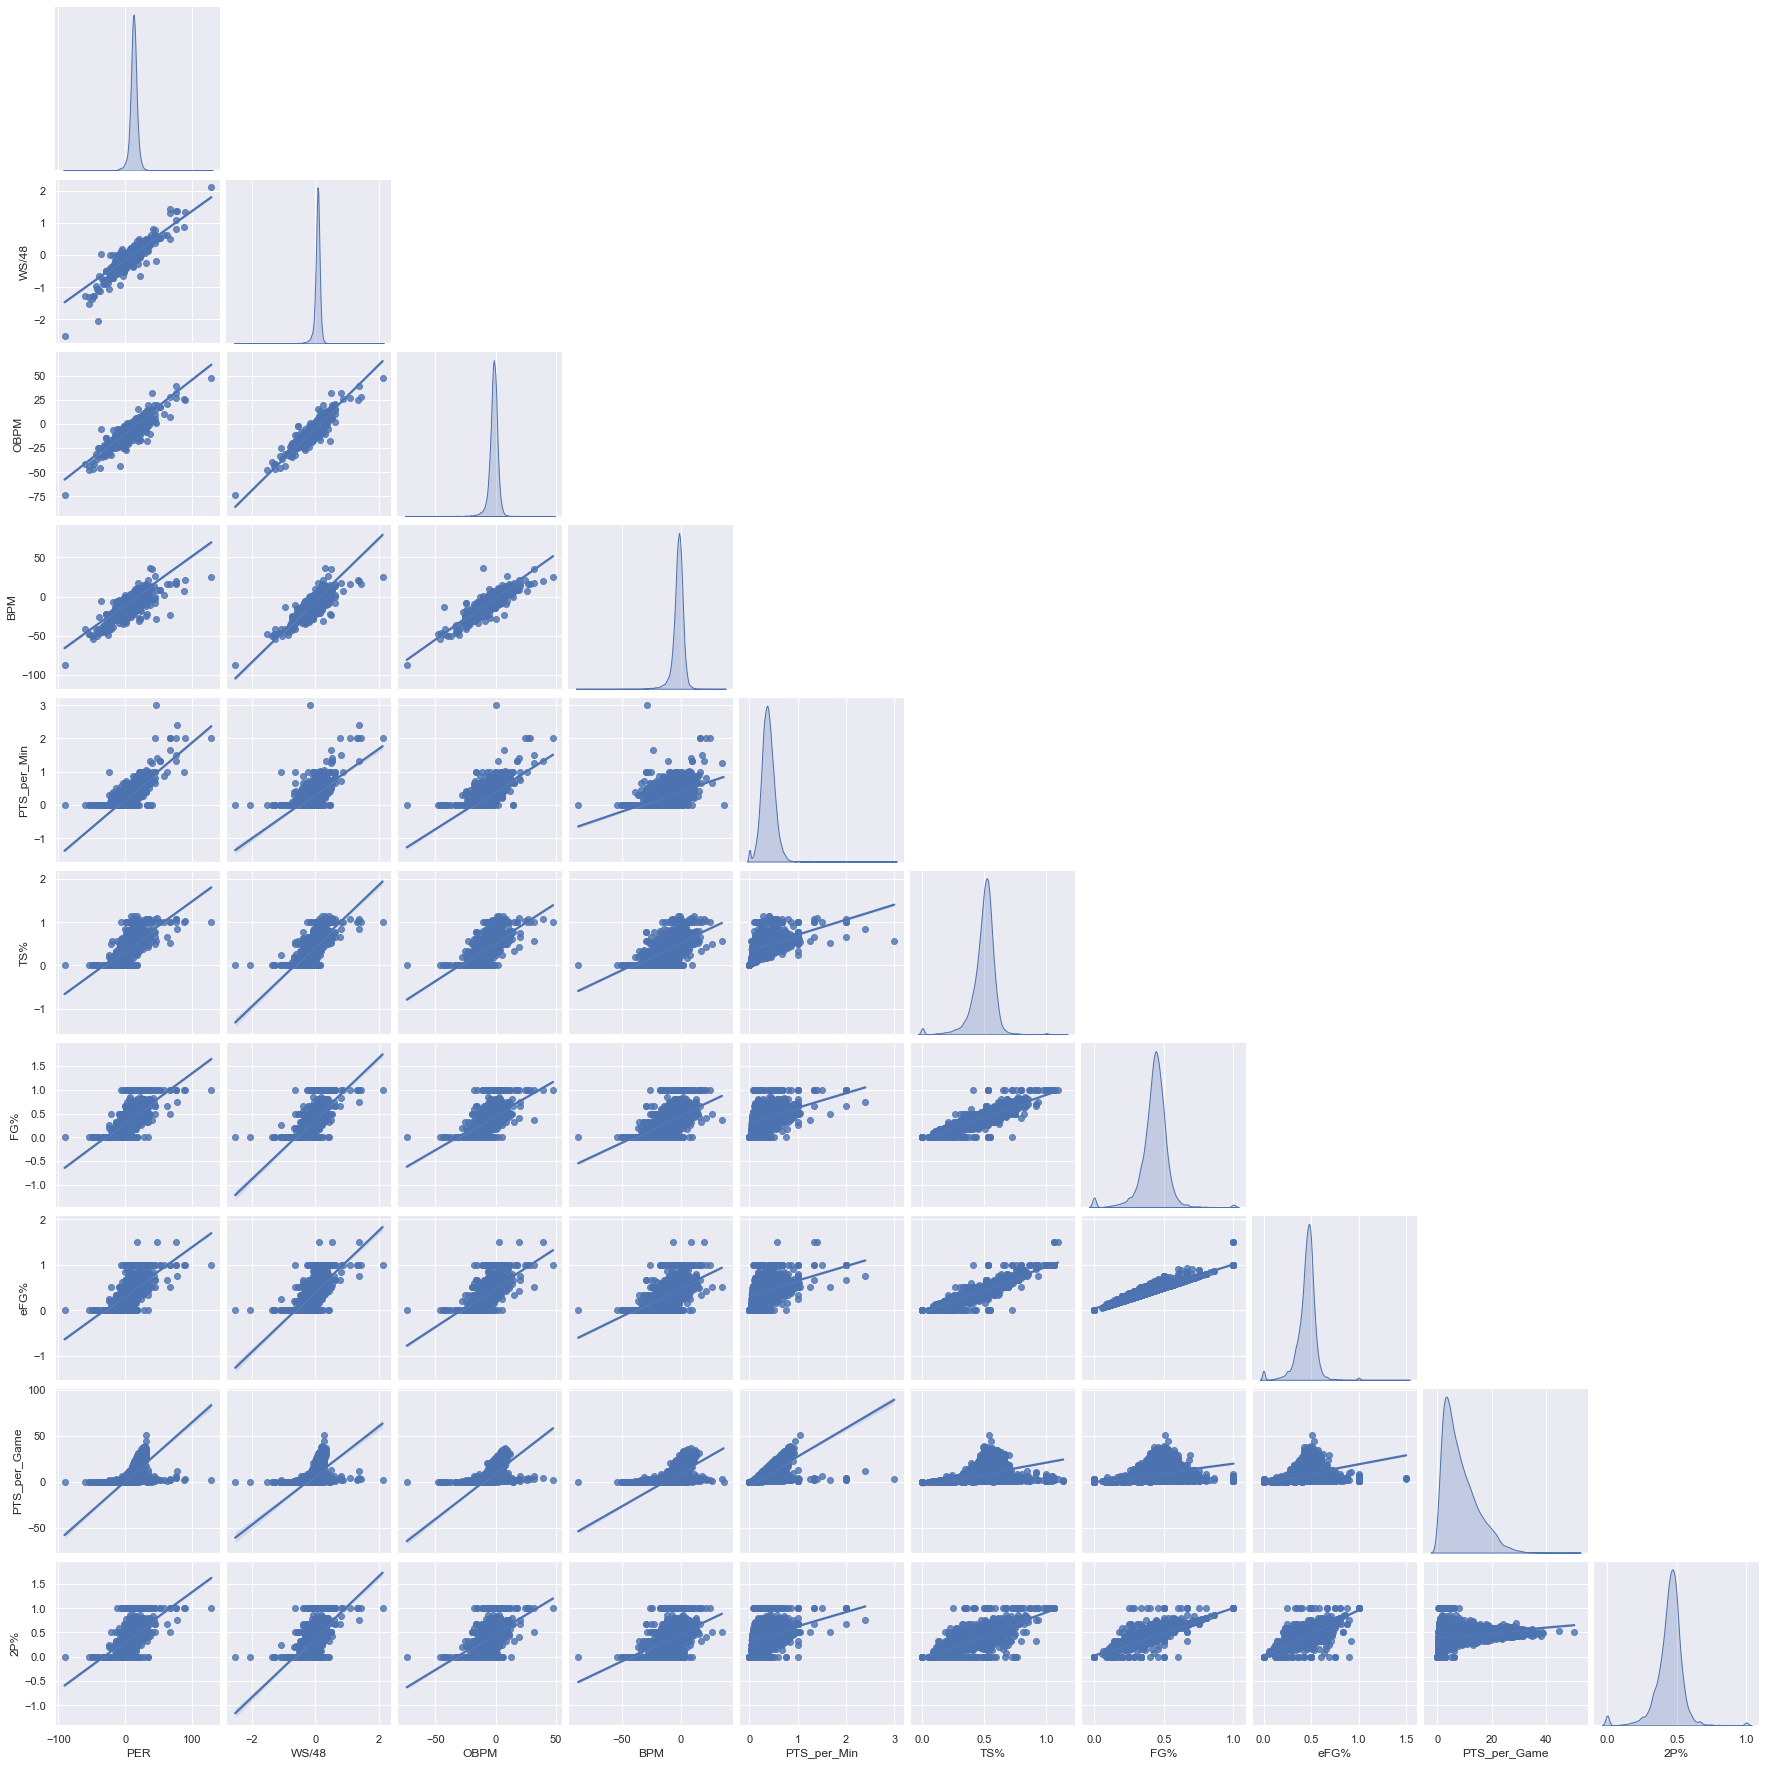

In [71]:
# Наостанок побудуємо pairplot для топ-10 фіч, що корелюють з PER:
sns.pairplot(df_subset, corner=True, kind='reg', diag_kind='kde')

In [ ]:
# Pairplot побудував нам діаграми розсіювання для кожної пари фіч, а по діагоналі розмістив функції щільності цих фіч.
# Бачимо, що майже всі вони мають нормальний закон розподілу (PTS_per_Game - з вираженим зкосом вправо). Також на
# графіках розсіювання бачимо лінії рагресії, що ще більше підвищує зручність аналізу взаємозв'язків між фічами.

In [ ]:
# В цілому даний датасет показав мені, як важливо мати знання домену, в даному випадку баскетболу. У датасеті є 
# велика кількість фіч, які самі по собі потребують широких знань гри та дають можливість знайти цікаві інсайти, 
# недоступні тим, хто не орієнтується в баскетболі